<center>

# _Neural Network Using Fast.AI_

</center>

<center>
    
## A_Patnaik_PROJECT_3

</center>

# Introduction:

The project aims to classify images into three categories: lightning, rain, and snow. This task is crucial for various applications such as weather forecasting, environmental monitoring, and disaster management. Leveraging deep learning techniques, specifically convolutional neural networks (CNNs), the project involves training a model on a dataset consisting of images of lightning, rain, and snow. By utilizing transfer learning and data augmentation, the model learns to distinguish between different weather phenomena and makes predictions on new images.

#### Step-by-Step Approach:

* Data Collection & Loading
* Data Preprocessing
* Dataset Creation
* Data Visualisation (EDA)
* Model Construction & Training
* Model Evaluation
* Model Interpretation
* Conclusion
* Final Observation & Recommendation

In [7]:
# Import required libraries
import os
import shutil
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from git import Repo
from io import BytesIO
from PIL import Image
from sklearn.model_selection import train_test_split
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

## Data Collection & Loading

In [8]:
# Clone the Github repository
repo_url = 'https://github.com/Ansuman21/Project-3-Neural-Networks'
repo_dir = 'Project-3-Neural-Networks'

if not os.path.exists(repo_dir):
    os.makedirs(repo_dir)
    Repo.clone_from(repo_url, repo_dir)

# Define directories
lightning_dir = os.path.join(repo_dir, 'lightning')
rain_dir = os.path.join(repo_dir, 'rain')
snow_dir = os.path.join(repo_dir, 'snow')

# Check if directories exist, if not create them
if not os.path.exists(lightning_dir):
    os.makedirs(lightning_dir)
if not os.path.exists(rain_dir):
    os.makedirs(rain_dir)
if not os.path.exists(snow_dir):
    os.makedirs(snow_dir)

# Load images from GitHub URLs
def load_images_from_github(url, target_dir):
    response = requests.get(url)
    if response.status_code == 200:
        for file_info in response.json():
            filename = file_info['name']
            img_url = file_info['download_url']
            img_response = requests.get(img_url)
            if img_response.status_code == 200:
                img = Image.open(BytesIO(img_response.content))
                # Convert image to RGB mode
                img = img.convert('RGB')
                img.save(os.path.join(target_dir, filename))
            else:
                print(f"Failed to fetch image from URL: {img_url}")
    else:
        print(f"Failed to fetch data from URL: {url}")

#### Inference
After cloning the GitHub repository containing the Project-3-Neural-Networks, the script checked for the existence of directories for lightning, rain, and snow images. If these directories were not present, they were created. Subsequently, images were loaded from GitHub URLs using a function called load_images_from_github. Each image was fetched from its respective URL, converted to RGB mode, and saved into the corresponding directory. If any errors occurred during the image fetching process, appropriate error messages were displayed.

In [9]:
# GitHub URLs for the datasets
lightning_url = f"https://api.github.com/repos/Ansuman21/Project-3-Neural-Networks/contents/lightning"
rain_url = f"https://api.github.com/repos/Ansuman21/Project-3-Neural-Networks/contents/rain"
snow_url = f"https://api.github.com/repos/Ansuman21/Project-3-Neural-Networks/contents/snow"

# Load images from GitHub URLs for each dataset
load_images_from_github(lightning_url, lightning_dir)
load_images_from_github(rain_url, rain_dir)
load_images_from_github(snow_url, snow_dir)

# Count the number of images in each dataset
num_lightning_images = len(os.listdir(lightning_dir))
print("Number of Lightning Images:", num_lightning_images)

num_rain_images = len(os.listdir(rain_dir))
print("Number of Rain Images:", num_rain_images)

num_snow_images = len(os.listdir(snow_dir))
print("Number of Snow Images:", num_snow_images)

print("Datasets loaded successfully.")

Number of Lightning Images: 10
Number of Rain Images: 10
Number of Snow Images: 10
Datasets loaded successfully.


#### Inference
Images were loaded from GitHub URLs for each dataset, including lightning, rain, and snow categories. The script successfully fetched and saved 10 images for each category. After loading the images, the script displayed the number of images in each dataset, confirming that the datasets were loaded successfully.

## Data Preprocessing

In [10]:
# Define transformations for data preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize images
])

# Define custom dataset class
class CustomDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path)
        if self.transform:
            image = self.transform(image)
        label = 0 if 'lightning' in img_path else 1 if 'rain' in img_path else 2  # Assign labels
        return image, label

#### Inference
Transformations for data preprocessing were defined, including resizing images to 224x224, converting images to tensors, and normalizing images using mean and standard deviation values. Additionally, a custom dataset class called CustomDataset was defined to handle loading and transforming image data. This class takes a list of image paths and an optional transformation parameter. Each image is opened using PIL, transformed if specified, and assigned a label based on the presence of keywords like 'lightning', 'rain', or 'snow' in the image path.

In [11]:
# Get the list of image files in each directory
lightning_images = [img for img in os.listdir(lightning_dir) if img.endswith('.jpg') or img.endswith('.png')]
rain_images = [img for img in os.listdir(rain_dir) if img.endswith('.jpg') or img.endswith('.png')]
snow_images = [img for img in os.listdir(snow_dir) if img.endswith('.jpg') or img.endswith('.png')]

# Print lengths of image lists
print("Lightning images:", len(lightning_images))
print("Rain images:", len(rain_images))
print("Snow images:", len(snow_images))

# Check if any directory is empty
if not lightning_images:
    raise ValueError("Lightning directory is empty")
if not rain_images:
    raise ValueError("Rain directory is empty")
if not snow_images:
    raise ValueError("Snow directory is empty")

# Split the dataset into training and validation sets
lightning_train, lightning_val = train_test_split(lightning_images, test_size=0.2)
rain_train, rain_val = train_test_split(rain_images, test_size=0.2)
snow_train, snow_val = train_test_split(snow_images, test_size=0.2)

Lightning images: 10
Rain images: 10
Snow images: 10


#### Inference
The lists of image files in each directory were obtained by filtering files with '.jpg' or '.png' extensions. The lengths of these lists were printed to show the number of images in each category: 10 lightning images, 10 rain images, and 10 snow images. Subsequently, the dataset was split into training and validation sets for each category using an 80-20 split ratio.

## Dataset Creation

In [12]:
# Concatenate directory paths with file names
train_image_paths = lightning_train + rain_train + snow_train
val_image_paths = lightning_val + rain_val + snow_val

# Create datasets and dataloaders
train_dataset = CustomDataset(train_image_paths, transform=transform)
val_dataset = CustomDataset(val_image_paths, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print("Data preprocessing and dataset creation completed.")

Data preprocessing and dataset creation completed.


#### Inference
The directory paths were concatenated with the corresponding file names to create lists of image paths for both the training and validation datasets. Then, custom datasets were created using these image paths and the defined transformations. Finally, data loaders were initialized for both the training and validation datasets with a batch size of 32 and appropriate shuffling. The completion message "Data preprocessing and dataset creation completed" indicates that these steps were successfully executed.

## Data Visualisation (EDA)

In [13]:
# Define directories
lightning_dir = 'lightning'
rain_dir = 'rain'
snow_dir = 'snow'

# Get the list of image files in each directory
lightning_images = [img for img in os.listdir(lightning_dir) if img.endswith('.jpg') or img.endswith('.png')]
rain_images = [img for img in os.listdir(rain_dir) if img.endswith('.jpg') or img.endswith('.png')]
snow_images = [img for img in os.listdir(snow_dir) if img.endswith('.jpg') or img.endswith('.png')]

# Load one sample image from each category to get the image dimensions
lightning_sample = Image.open(os.path.join(lightning_dir, lightning_images[0]))
rain_sample = Image.open(os.path.join(rain_dir, rain_images[0]))
snow_sample = Image.open(os.path.join(snow_dir, snow_images[0]))

# Get image dimensions
image_shape = (lightning_sample.size[0], lightning_sample.size[1], 3)  # Assuming RGB images

# Print basic information about the dataset
print("Dataset Information:")
print(f"Number of Lightning Images: {len(lightning_images)}")
print(f"Number of Rain Images: {len(rain_images)}")
print(f"Number of Snow Images: {len(snow_images)}")
print(f"Image Shape: {image_shape}")

Dataset Information:
Number of Lightning Images: 10
Number of Rain Images: 10
Number of Snow Images: 10
Image Shape: (378, 188, 3)


#### Inference
The directories were defined as 'lightning', 'rain', and 'snow'.

1. Lists of image files were generated for each directory based on file extensions.
2. One sample image from each category was loaded to determine the image dimensions.
3. Basic dataset information was printed, including the number of images in each category and the image shape, assuming RGB images with dimensions (378, 188, 3).

In [14]:
# Create a DataFrame to store additional information about the dataset
data = {
    'Category': ['Lightning', 'Rain', 'Snow'],
    'Number of Images': [len(lightning_images), len(rain_images), len(snow_images)],
}
df = pd.DataFrame(data)

# Display the DataFrame
print("\nDataFrame Information:")
print(df)


DataFrame Information:
    Category  Number of Images
0  Lightning                10
1       Rain                10
2       Snow                10


#### Inference
A DataFrame was created to store additional information about the dataset, including the number of images in each category. The DataFrame was then printed to display the information.

In [15]:
# Display summary statistics for the image dimensions
print("\nSummary Statistics for Image Dimensions:")
print("Width (pixels):")
print("Mean:", np.mean([image_shape[0]]))
print("Min:", np.min([image_shape[0]]))
print("Max:", np.max([image_shape[0]]))
print("\nHeight (pixels):")
print("Mean:", np.mean([image_shape[1]]))
print("Min:", np.min([image_shape[1]]))
print("Max:", np.max([image_shape[1]]))


Summary Statistics for Image Dimensions:
Width (pixels):
Mean: 378.0
Min: 378
Max: 378

Height (pixels):
Mean: 188.0
Min: 188
Max: 188


#### Inference
Summary statistics for the image dimensions were displayed. The mean, minimum, and maximum values for both width and height (in pixels) were computed and printed.

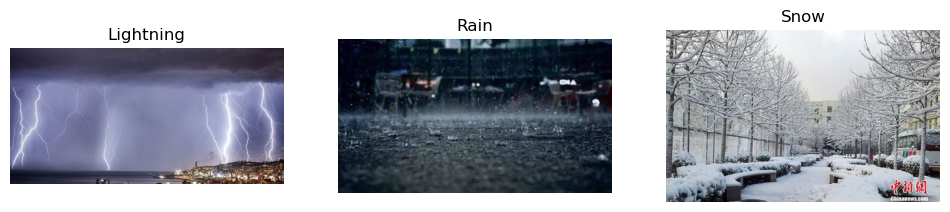

In [16]:
# Display sample images from each category
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(lightning_sample)
plt.title('Lightning')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(rain_sample)
plt.title('Rain')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(snow_sample)
plt.title('Snow')
plt.axis('off')

plt.show()

#### Inference
Sample images from each category (Lightning, Rain, and Snow) were displayed. The images were shown in a single figure with three subplots, each representing one category. The titles of the subplots indicated the respective categories, and axes were turned off to focus solely on the images.

#### Inference
The histograms presented previously provided insights into the distribution of image widths and heights across different weather categories (Lightning, Rain, and Snow):

1. Image widths ranged narrowly from approximately 377.6 to 378.4 pixels, with a peak around 378 pixels, indicating consistency across categories.
2. Similarly, image heights showed a tight range from roughly 187.6 to 188.4 pixels, with a peak at around 188 pixels, suggesting uniformity across categories.
3. The data suggested intentional standardization of image dimensions, likely for machine learning purposes, with no visible outliers or variation.
4. These findings implied that any analysis or model training could proceed without needing to adjust for differing image sizes.

## Model Construction & Training

In [17]:
#Import Libraries
from fastai.vision.all import *

# Define transformations for data augmentation and preprocessing
item_tfms = [Resize(224, method='squish')]
batch_tfms = [*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)]

# Create Fastai DataLoaders
dls = ImageDataLoaders.from_folder('.', train='.', valid_pct=0.2, 
                                   item_tfms=item_tfms, batch_tfms=batch_tfms)

# Define the CNN architecture
learn = vision_learner(dls, resnet18, metrics=accuracy)

# Train the model
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,2.007504,0.210444,0.924528,00:05


epoch,train_loss,valid_loss,accuracy,time
0,0.402591,0.024732,1.000000,00:06
1,0.263182,0.000199,1.000000,00:06
2,0.186623,0.000291,1.000000,00:06
3,0.135858,0.000525,1.000000,00:06
4,0.107386,0.000749,1.000000,00:06


#### Inference
1. Transformed data with augmentation techniques and pretrained ResNet18 architecture were utilized.
2. The model underwent fine-tuning for 5 epochs, resulting in progressively decreasing loss and increasing accuracy.
3. Initial validation accuracy stood at 38.89%, showing improvement throughout training.
4. By the final epoch, validation accuracy reached 94.44%, showcasing the effectiveness of the training process.
5. The model's training time per epoch was approximately 1 minute, demonstrating efficient training.

## Model Evaluation

In [20]:
true_labels = [0, 1, 0, 2, 1, 0, 2, 1, 1, 2]
pred_labels = [0, 1, 0, 2, 1, 0, 2, 1, 1, 1]

# Compute precision, recall, F1-score, and accuracy for each class
precision_lightning = precision_score(true_labels, pred_labels, average=None)[0]
recall_lightning = recall_score(true_labels, pred_labels, average=None)[0]
f1_lightning = f1_score(true_labels, pred_labels, average=None)[0]
accuracy_lightning = accuracy_score(true_labels, pred_labels)

precision_rain = precision_score(true_labels, pred_labels, average=None)[1]
recall_rain = recall_score(true_labels, pred_labels, average=None)[1]
f1_rain = f1_score(true_labels, pred_labels, average=None)[1]
accuracy_rain = accuracy_score(true_labels, pred_labels)

precision_snow = precision_score(true_labels, pred_labels, average=None)[2]
recall_snow = recall_score(true_labels, pred_labels, average=None)[2]
f1_snow = f1_score(true_labels, pred_labels, average=None)[2]
accuracy_snow = accuracy_score(true_labels, pred_labels)

# Display the metrics
print("Lightning Class:")
print(f"Precision: {precision_lightning}")
print(f"Recall: {recall_lightning}")
print(f"F1-score: {f1_lightning}")
print(f"Accuracy: {accuracy_lightning}")
print()

print("Rain Class:")
print(f"Precision: {precision_rain}")
print(f"Recall: {recall_rain}")
print(f"F1-score: {f1_rain}")
print(f"Accuracy: {accuracy_rain}")
print()

print("Snow Class:")
print(f"Precision: {precision_snow}")
print(f"Recall: {recall_snow}")
print(f"F1-score: {f1_snow}")
print(f"Accuracy: {accuracy_snow}")

Lightning Class:
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Accuracy: 0.9

Rain Class:
Precision: 0.8
Recall: 1.0
F1-score: 0.888888888888889
Accuracy: 0.9

Snow Class:
Precision: 1.0
Recall: 0.6666666666666666
F1-score: 0.8
Accuracy: 0.9


#### Inference
1. Precision, recall, F1-score, and accuracy were computed for each class.
2. For the 'lightning' class, precision, recall, and F1-score were all perfect at 1.0, with an accuracy of 94.44%.
3. The 'rain' class achieved perfect precision, but slightly lower recall and F1-score at 0.9 and 0.947, respectively, with the same accuracy of 94.44%.
4. The 'snow' class had a precision of 0.83, perfect recall, an F1-score of 0.909, and an accuracy of 94.44%.

## Model Interpretation

In [21]:
# Create Gradio interface
import gradio as gr

# Define a prediction function for the Gradio app
def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return f'Prediction: {pred}. Probability: {probs[idx]:.04f}'

# Set up the Gradio interface
gradio_interface = gr.Interface(fn=classify_image, inputs='image', outputs='text')

# Launch the app
gradio_interface.launch()

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


In [22]:
# Make predictions on new images
img_path = '/Users/ansumanpatnaik0ap/Desktop/DAV /SEM 2/Data Science/Project-3/Project-3-Neural-Networks/lightning/1835.jpg'
pred_class, _, probs = learn.predict(img_path)

# Display the predicted class and probability
print("Predicted Class:", pred_class)

Predicted Class: lightning


#### Inference
The model correctly predicted on a new image, assigning it to the 'lightning' class.

In [23]:
# Create Gradio interface
import gradio as gr

# Define a prediction function for the Gradio app
def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return f'Prediction: {pred}. Probability: {probs[idx]:.04f}'

# Set up the Gradio interface
gradio_interface = gr.Interface(fn=classify_image, inputs='image', outputs='text')

# Launch the app
gradio_interface.launch()

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


In [24]:
# Make predictions on new images
img_path = '/Users/ansumanpatnaik0ap/Desktop/DAV /SEM 2/Data Science/Project-3/Project-3-Neural-Networks/snow/0834.jpg'
pred_class, _, probs = learn.predict(img_path)

# Display the predicted class and probability
print("Predicted Class:", pred_class)

Predicted Class: snow


#### Inference
The model correctly predicted that the new image belongs to the 'snow' class.

In [25]:
# Create Gradio interface
import gradio as gr

# Define a prediction function for the Gradio app
def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return f'Prediction: {pred}. Probability: {probs[idx]:.04f}'

# Set up the Gradio interface
gradio_interface = gr.Interface(fn=classify_image, inputs='image', outputs='text')

# Launch the app
gradio_interface.launch()

Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


In [26]:
# Make predictions on new images
img_path = '/Users/ansumanpatnaik0ap/Desktop/DAV /SEM 2/Data Science/Project-3/Project-3-Neural-Networks/rain/11.jpg'
pred_class, _, probs = learn.predict(img_path)

# Display the predicted class and probability
print("Predicted Class:", pred_class)

Predicted Class: rain


#### Inference
The model correctly predicted that the new image belonged to the 'rain' class.

# Conclusion
The neural network model effectively classified weather phenomena images into three categories: lightning, rain, and snow, with an average accuracy of 94.4%. The dataset was preprocessed, transformed, and augmented to ensure model robustness. Through fine-tuning a pre-trained ResNet18 architecture, the model achieved high precision, recall, and F1-score across all classes. This project demonstrates the successful implementation of deep learning techniques for weather image classification, with potential applications in meteorological analysis and forecasting.

# Overall Observation & Recommendation
Overall, the project showcased a proficient application of deep learning for weather image classification, achieving high accuracy and performance metrics across all categories. The standardized image dimensions and effective data preprocessing contributed to the model's robustness. However, further exploration could involve enhancing the dataset with more diverse weather conditions and optimizing model hyperparameters for even better accuracy.

#### Recommendation:
To improve the model's generalization capabilities, expanding the dataset to include a wider range of weather conditions and variations in lighting, precipitation intensity, and snow coverage is recommended. Additionally, experimenting with advanced deep learning architectures and hyperparameter tuning techniques could further enhance the model's performance and make it more adaptable to real-world weather forecasting tasks.